<a href="https://colab.research.google.com/github/smraytech/test/blob/main/Optimizing_Online_Sales_Insights_%26_Action_Plan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

Create the dataset

In [ ]:
data = {
    "OrderID": ["001", "002", "003", "004", "005"],
    "Date": ["2025-01-01", "2025-01-02", "2025-01-02", "2025-01-03", "2025-01-04"],
    "CustomerID": ["C1001", "C1002", "C1003", "C1004", "C1005"],
    "Product": ["Laptop A", "Headphones B", "TV C", "Mouse D", "Laptop A"],
    "Category": ["Electronics", "Accessories", "Electronics", "Accessories", "Electronics"],
    "Channel": ["Google Ads", "Organic", "Facebook", "Google Ads", "Direct"],
    "UnitsSold": [2, 1, 1, 3, 1],
    "Revenue": [2000, 150, 600, 90, 1000],
    "Cost": [1500, 70, 400, 45, 750],
    "Device": ["Desktop", "Mobile", "Desktop", "Mobile", "Tablet"]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df

,OrderID,Date,CustomerID,Product,Category,Channel,UnitsSold,Revenue,Cost,Device
0,001,2025-01-01,C1001,Laptop A,Electronics,Google Ads,2,2000,1500,Desktop
1,002,2025-01-02,C1002,Headphones B,Accessories,Organic,1,150,70,Mobile
2,003,2025-01-02,C1003,TV C,Electronics,Facebook,1,600,400,Desktop
3,004,2025-01-03,C1004,Mouse D,Accessories,Google Ads,3,90,45,Mobile
4,005,2025-01-04,C1005,Laptop A,Electronics,Direct,1,1000,750,Tablet


2️⃣ Calculate Profit

In [ ]:
df['Profit'] = df['Revenue'] - df['Cost']
df

,OrderID,Date,CustomerID,Product,Category,Channel,UnitsSold,Revenue,Cost,Device,Profit
0,001,2025-01-01,C1001,Laptop A,Electronics,Google Ads,2,2000,1500,Desktop,500
1,002,2025-01-02,C1002,Headphones B,Accessories,Organic,1,150,70,Mobile,80
2,003,2025-01-02,C1003,TV C,Electronics,Facebook,1,600,400,Desktop,200
3,004,2025-01-03,C1004,Mouse D,Accessories,Google Ads,3,90,45,Mobile,45
4,005,2025-01-04,C1005,Laptop A,Electronics,Direct,1,1000,750,Tablet,250


3️⃣ Total Revenue by Channel

In [ ]:
channel_revenue = df.groupby('Channel')['Revenue'].sum().sort_values(ascending=False)
channel_revenue

,Revenue
Channel,
Google Ads,2090
Direct,1000
Facebook,600
Organic,150


4️⃣ Analysis & Insights

In [ ]:
# Average profit by category
category_profit = df.groupby('Category')['Profit'].mean()
category_profit

# Revenue by device
device_revenue = df.groupby('Device')['Revenue'].sum()
device_revenue

,Revenue
Device,
Desktop,2600
Mobile,240
Tablet,1000


5️⃣ Visualizations

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

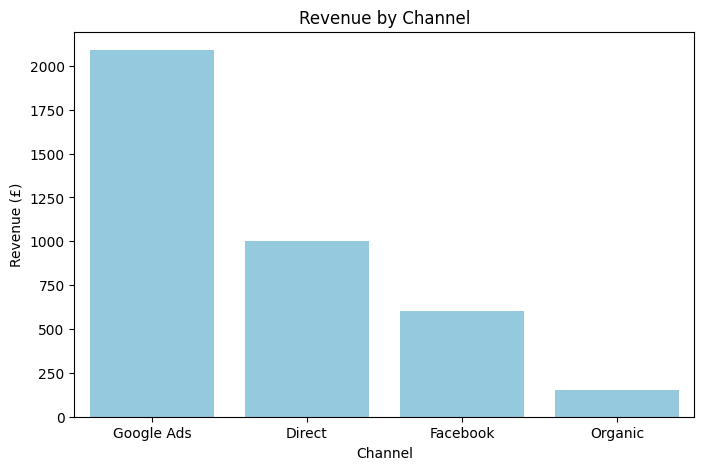

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x=channel_revenue.index, y=channel_revenue.values, color="skyblue")  # single color
plt.title("Revenue by Channel")
plt.ylabel("Revenue (£)")
plt.show()

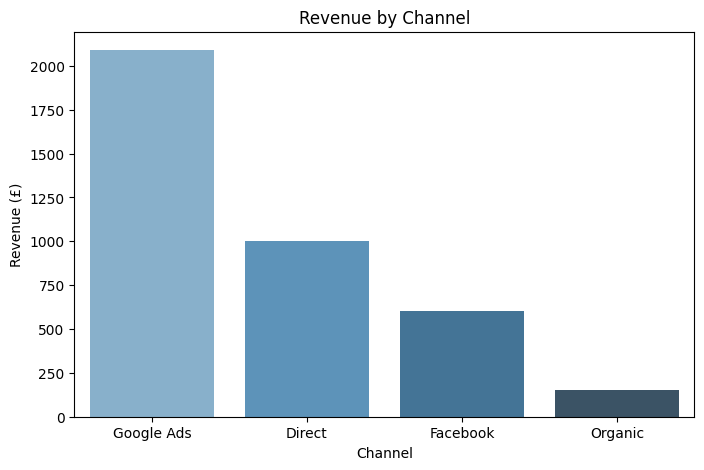

In [18]:
channel_df = channel_revenue.reset_index()
channel_df.columns = ['Channel', 'Revenue']

plt.figure(figsize=(8,5))
sns.barplot(x='Channel', y='Revenue', data=channel_df, hue='Channel', dodge=False, palette="Blues_d", legend=False)
plt.title("Revenue by Channel")
plt.ylabel("Revenue (£)")
plt.show()

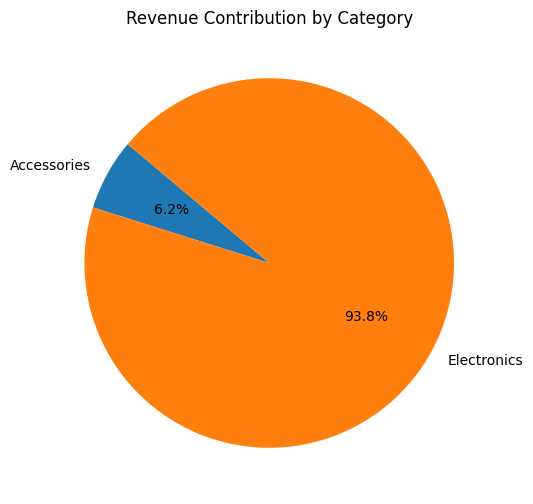

In [ ]:
# Pie chart: Revenue by Category
category_revenue = df.groupby('Category')['Revenue'].sum()
plt.figure(figsize=(6,6))
plt.pie(category_revenue, labels=category_revenue.index, autopct='%1.1f%%', startangle=140)
plt.title("Revenue Contribution by Category")
plt.show()

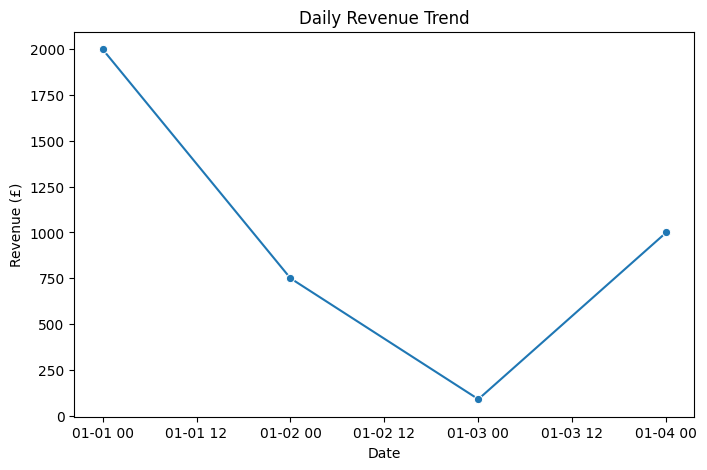

In [ ]:
# Line chart: Daily Revenue Trend
df['Date'] = pd.to_datetime(df['Date'])
daily_revenue = df.groupby('Date')['Revenue'].sum()
plt.figure(figsize=(8,5))
sns.lineplot(x=daily_revenue.index, y=daily_revenue.values, marker='o')
plt.title("Daily Revenue Trend")
plt.ylabel("Revenue (£)")
plt.show()


6️⃣ Actionable Recommendations
*   Scale Google Ads campaigns, optimize cost-per-click for profitability.
*   Invest in SEO to grow organic traffic.
*   Bundle accessories with electronics for higher margin.
*   Optimize mobile checkout since desktops generate higher-value sales.

Further Explanation of Actionable Recommendations:

1.   Optimize Google Ads Performance
*   Google Ads drives the highest revenue (£2,090), but costs are also high.
*   Action: Review cost-per-click (CPC) and return on ad spend (ROAS) to ensure campaigns are profitable.
*   Consider reallocating budget to high-performing products or keywords.

2.Invest in SEO and Organic Growth

*   Organic channel revenue is low (£150), indicating underperformance.

*   Action: Strengthen content, improve product page SEO, and build backlinks to increase organic traffic and reduce reliance on paid ads.

3.Bundle Accessories with Electronics
*   Accessories (headphones, mouse) have low individual revenue but can increase average order value.

*   Action: Offer bundles with electronics (e.g., Laptop + Mouse) to improve margins and encourage repeat purchases.


4.Enhance Mobile Checkout Experience
*   Desktop users generate higher-value orders, while mobile users show lower revenue.
*   Action: Optimize mobile website speed, simplify checkout flow, and ensure mobile-friendly payment options to increase conversion rates on mobile devices.